In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
import zipfile

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\attlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
import zipfile
import re

In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
class My_Model:
    def __init__(self):
        self.stop_words = self._get_stopwords()
        self.data = self._read_data()
        
    def _read_data(self):
        file = zipfile.ZipFile('data/reviews.zip', 'r')
        data = pd.read_csv(file.open('Reviews.csv'))
        return data[['Text', 'Score']]

    def _get_stopwords(self, my_stopwords=[]):
        stop_words = set(stopwords.words('english'))
        stop_words.update(my_stopwords)
        stop_words.update(punctuation)
        return stop_words

    def add_stopwords(self, new_stopwords: list[str] | str):
        self.stop_words.update(new_stopwords)
        return None

    def prepare_data(self):
        def clean_and_split_text(text: str) -> list[str]:
            lemmatizer = WordNetLemmatizer()
            
            pattern = '<.+?>'  # pattern for searching html tags
            
            text = re.sub(pattern, ' ', text)  # cleaning from html tags 
            text = word_tokenize(text)
            text = [lemmatizer.lemmatize(word.strip()) for word in text if word not in self.stop_words]
            return text
    
        self.data.Text = self.data['Text'].str.lower()
        self.data.Text = self.data['Text'].apply(clean_and_split_text)
        return None

    def get_splited_data(self, train_size=0.8):
        return train_test_split(
            self.data.Text, self.data.Score, train_size=train_size
        )


In [5]:
class My_Cloud:
    """Creating a WordCloud object from a text dataframe."""  
    def __init__(self, data: list[list[str]]):
        self.data = data
    
    def _get_str_corpus(self, corpus: list[str]) -> str:
        """
        Getting a sentence from a list of words.
        It's using in _get_wordClound function.
        """
        str_corpus = ''
        for word in corpus:
            str_corpus += ' ' + word
        str_corpus = str_corpus.strip()
        return str_corpus

    def _get_corpus(self, data: list[list[str]]) -> list[str]:
        """Getting a list of all words.""" 
        corpus = []
        for phrase in data:
            for word in phrase:
                corpus.append(word)
        return corpus

    def _get_wordCloud(self, corpus: list[str]):
        wordCloud = WordCloud(background_color='white', stopwords=STOPWORDS,
                              width=3000, height=2500, max_words=200,
                              random_state=42).generate(self._get_str_corpus(corpus))
        return wordCloud

    def show_wordCloud(self):
        corpus = self._get_corpus(self.data)
        procWordCloud = self._get_wordCloud(corpus)
        
        fig = plt.figure(figsize=(20, 8))
        plt.subplot(1, 2, 1)
        plt.imshow(procWordCloud)
        plt.axis('off')
        plt.subplot(1, 2, 1)
        return None

In [6]:
model = My_Model()
my_stopwords = ["u", "'s", "n't"]
model.add_stopwords(my_stopwords)
model.data

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5


In [7]:
model.prepare_data()
model.data.Text

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, century, light, pillowy, ...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chicken, .., good, better, res...
568450    ['m, disappointed, flavor, chocolate, note, es...
568451    [star, small, give, 10-15, one, training, sess...
568452    [best, treat, training, rewarding, dog, good, ...
568453    [satisfied, product, advertised, use, cereal, ...
Name: Text, Length: 568454, dtype: object

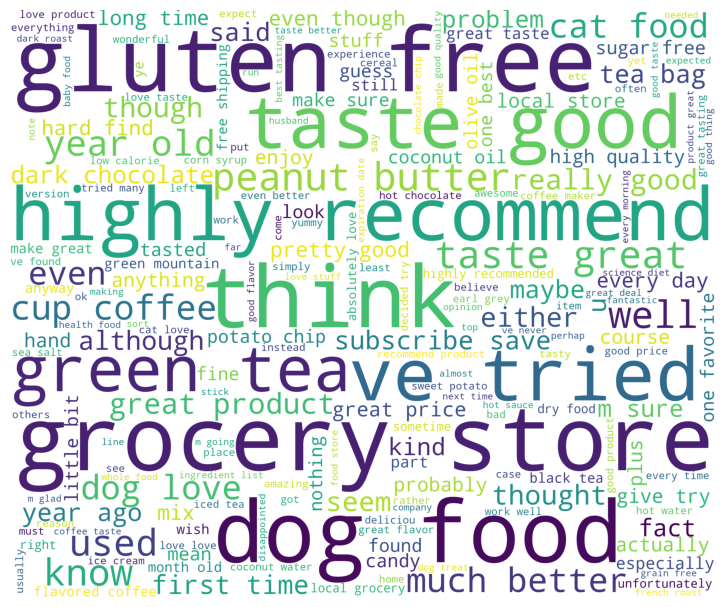

In [8]:
cloud = My_Cloud(model.data['Text'])
cloud.show_wordCloud()